# ML Basics, warming up with small data

In [1]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import metrics
import pandas as pd
import seaborn as sns
import numpy as np

Automatically created module for IPython interactive environment


### Read poll data

In [73]:
dfInit = pd.read_csv(('./Data/MUSA650-Spring2021-WelcomePoll.csv'))
dfInit.tail(10)

,Timestamp,Q1_General background in data analysis?,Q2_Hands-on experience in data analysis using Python?,Q3_Experience in programming in general?\t,Q4_General background in machine learning?\t,Q5_Hands-on experience in running machine learning applications?\t,Q6_Which one would you prefer on a Sunday afternoon?\t,Q7_Hands-on experience in image analysis using satellite images?\t,Q8_Level of interest in mathematics?\t,Q9_Level of interest in reading?\t,Q10_Level of stress about this class?\t,Q11_Your overall motivation about this class?
5,2021/01/25 10:34:46 AM EST,7,7,5,7,7,Reading,6,6,10,7,9
6,2021/01/25 10:34:50 AM EST,7,7,7,7,7,Watching a movie,4,9,10,8,10
7,2021/01/25 10:34:51 AM EST,4,6,5,3,3,Watching a movie,5,2,4,5,6
8,2021/01/25 10:35:21 AM EST,5,5,5,3,3,Reading,3,7,7,5,9
9,2021/01/25 10:35:38 AM EST,3,2,4,1,1,"Coding for the homework, project or just for fun",1,2,1,9,9
10,2021/01/25 10:37:42 AM EST,9,8,7,6,5,Reading,1,7,10,4,9
11,2021/01/25 10:37:54 AM EST,9,9,9,8,9,Watching a movie,5,6,6,6,8
12,2021/01/25 10:41:52 AM EST,4,4,4,4,4,"Coding for the homework, project or just for fun",6,7,4,8,9
13,2021/01/25 10:44:07 AM EST,4,4,2,2,2,Reading,1,1,10,8,10
14,2021/01/25 5:10:59 PM EST,5,5,6,2,1,Running,1,5,9,5,7


### Calculate relative timestamp

In [3]:
dfInit.Timestamp = pd.to_datetime(dfInit.Timestamp, format='%Y/%m/%d %I:%M:%S %p EST')
dfInit['tsRel'] = (dfInit.Timestamp - dfInit.Timestamp.min()).dt.total_seconds()
dfInit[['Timestamp', 'tsRel']].head(10)

,Timestamp,tsRel
0,2021-01-25 08:17:44,0.0
1,2021-01-25 08:37:14,1170.0
2,2021-01-25 09:15:33,3469.0
3,2021-01-25 10:34:17,8193.0
4,2021-01-25 10:34:42,8218.0
5,2021-01-25 10:34:46,8222.0
6,2021-01-25 10:34:50,8226.0
7,2021-01-25 10:34:51,8227.0
8,2021-01-25 10:35:21,8257.0
9,2021-01-25 10:35:38,8274.0


### Column names

In [4]:
df = dfInit[dfInit.columns[1:]]
initCol = df.columns.tolist()
initCol

['Q1_General background in data analysis?',
 'Q2_Hands-on experience in data analysis using Python?',
 'Q3_Experience in programming in general?\t',
 'Q4_General background in machine learning?\t',
 'Q5_Hands-on experience in running machine learning applications?\t',
 'Q6_Which one would you prefer on a Sunday afternoon?\t',
 'Q7_Hands-on experience in image analysis using satellite images?\t',
 'Q8_Level of interest in mathematics?\t',
 'Q9_Level of interest in reading?\t',
 'Q10_Level of stress about this class?\t',
 'Q11_Your overall motivation about this class?',
 'tsRel']

In [5]:
df.columns = df.columns.str.split('_', 1).str[0].tolist()
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,tsRel
0,7,5,7,5,5,"Coding for the homework, project or just for fun",7,7,7,5,10,0.0
1,7,7,6,6,5,"Coding for the homework, project or just for fun",7,4,7,9,6,1170.0
2,3,4,3,3,2,Watching a movie,5,2,6,8,7,3469.0
3,5,3,3,2,1,Watching a movie,3,5,5,5,8,8193.0
4,5,7,7,2,2,Watching a movie,8,8,8,5,8,8218.0


### Visualize correlations

In [6]:
df.corr()

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,tsRel
Q1,1.000000,0.823603,0.781631,0.849814,0.805270,0.153481,0.576032,0.511197,-0.321381,0.162826,-0.122377
Q2,0.823603,1.000000,0.806048,0.785048,0.771982,0.351666,0.490194,0.536814,-0.290010,-0.126485,-0.061205
Q3,0.781631,0.806048,1.000000,0.640784,0.660687,0.322891,0.645672,0.254697,-0.374491,-0.018487,0.037162
Q4,0.849814,0.785048,0.640784,1.000000,0.973359,0.350547,0.482847,0.402612,0.046561,0.133677,-0.293579
Q5,0.805270,0.771982,0.660687,0.973359,1.000000,0.374513,0.481481,0.329820,0.056621,0.213745,-0.308792
Q7,0.153481,0.351666,0.322891,0.350547,0.374513,1.000000,0.336587,-0.052633,0.061390,-0.218872,-0.516008
Q8,0.576032,0.490194,0.645672,0.482847,0.481481,0.336587,1.000000,0.376937,-0.373035,0.384742,0.011703
Q9,0.511197,0.536814,0.254697,0.402612,0.329820,-0.052633,0.376937,1.000000,-0.223927,0.283455,0.199320
Q10,-0.321381,-0.290010,-0.374491,0.046561,0.056621,0.061390,-0.373035,-0.223927,1.000000,0.051258,-0.273305
Q11,0.162826,-0.126485,-0.018487,0.133677,0.213745,-0.218872,0.384742,0.283455,0.051258,1.000000,-0.159292


<AxesSubplot:>

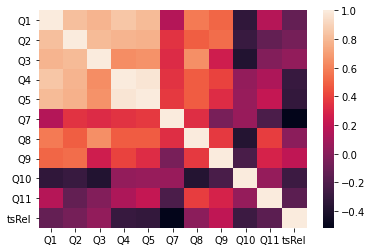

In [7]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [8]:
initCol

['Q1_General background in data analysis?',
 'Q2_Hands-on experience in data analysis using Python?',
 'Q3_Experience in programming in general?\t',
 'Q4_General background in machine learning?\t',
 'Q5_Hands-on experience in running machine learning applications?\t',
 'Q6_Which one would you prefer on a Sunday afternoon?\t',
 'Q7_Hands-on experience in image analysis using satellite images?\t',
 'Q8_Level of interest in mathematics?\t',
 'Q9_Level of interest in reading?\t',
 'Q10_Level of stress about this class?\t',
 'Q11_Your overall motivation about this class?',
 'tsRel']

### Handling categorical variables (visualization)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Coding for the homework, project or just for fun'),
  Text(1, 0, 'Watching a movie'),
  Text(2, 0, 'Reading'),
  Text(3, 0, 'Running')])

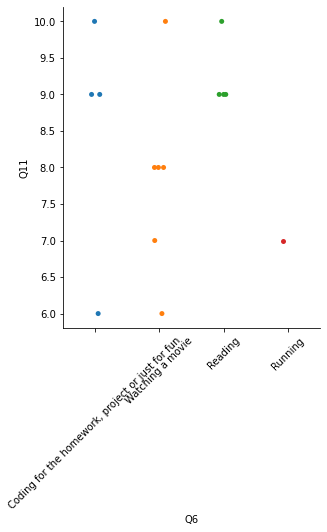

In [9]:
sns.catplot(x="Q6", y="Q11", data=df);
plt.xticks(rotation=45)


### Handling categorical variables (Data analysis)

In [10]:
df = pd.get_dummies(df, columns=['Q6'])

In [11]:
df

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,tsRel,"Q6_Coding for the homework, project or just for fun",Q6_Reading,Q6_Running,Q6_Watching a movie
0,7,5,7,5,5,7,7,7,5,10,0.0,1,0,0,0
1,7,7,6,6,5,7,4,7,9,6,1170.0,1,0,0,0
2,3,4,3,3,2,5,2,6,8,7,3469.0,0,0,0,1
3,5,3,3,2,1,3,5,5,5,8,8193.0,0,0,0,1
4,5,7,7,2,2,8,8,8,5,8,8218.0,0,0,0,1
5,7,7,5,7,7,6,6,10,7,9,8222.0,0,1,0,0
6,7,7,7,7,7,4,9,10,8,10,8226.0,0,0,0,1
7,4,6,5,3,3,5,2,4,5,6,8227.0,0,0,0,1
8,5,5,5,3,3,3,7,7,5,9,8257.0,0,1,0,0
9,3,2,4,1,1,1,2,1,9,9,8274.0,1,0,0,0


In [12]:
dfTmp = df[['Q8', 'Q9', 'Q10', 'Q11', 'Q6_Reading', 'Q6_Running', 'Q6_Watching a movie',]].copy()

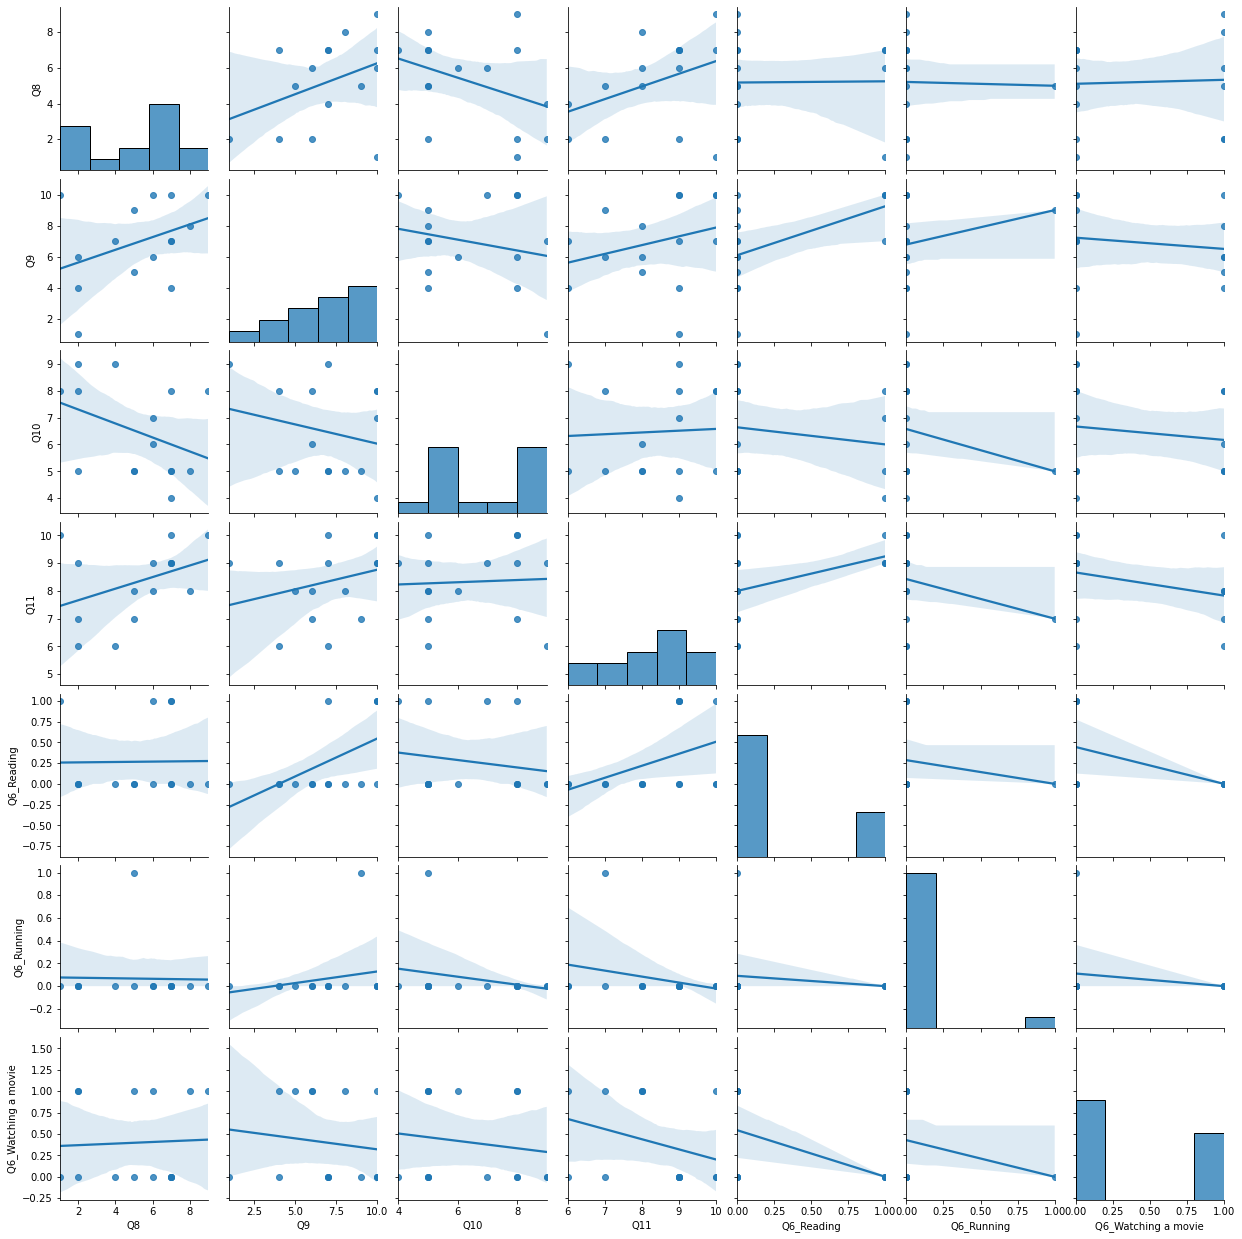

In [13]:
sns.pairplot(dfTmp, kind = 'reg')

<AxesSubplot:>

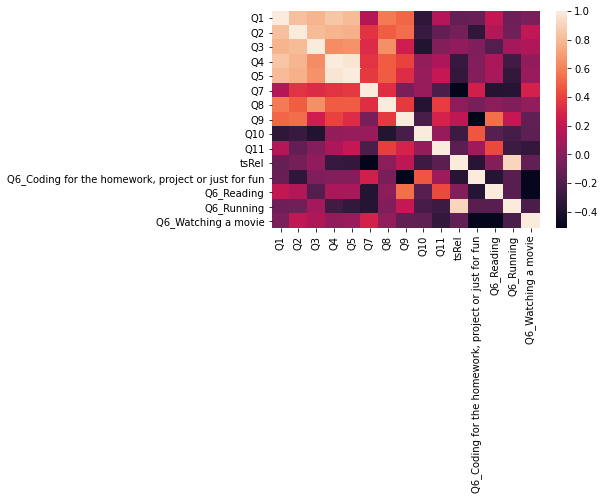

In [14]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

## Dealing with outliers (focusing on tsRel)

### Visualize data

In [15]:
initCol

['Q1_General background in data analysis?',
 'Q2_Hands-on experience in data analysis using Python?',
 'Q3_Experience in programming in general?\t',
 'Q4_General background in machine learning?\t',
 'Q5_Hands-on experience in running machine learning applications?\t',
 'Q6_Which one would you prefer on a Sunday afternoon?\t',
 'Q7_Hands-on experience in image analysis using satellite images?\t',
 'Q8_Level of interest in mathematics?\t',
 'Q9_Level of interest in reading?\t',
 'Q10_Level of stress about this class?\t',
 'Q11_Your overall motivation about this class?',
 'tsRel']

#### Q: Is there a correlation between how fast a student answered the poll and answers to questions?

tsRel    1.000000
Q3       0.037162
Q4      -0.293579
Q10     -0.273305
Q11     -0.159292
Name: tsRel, dtype: float64
          tsRel        Q3        Q4       Q10       Q11
tsRel  1.000000  0.037162 -0.293579 -0.273305 -0.159292
Q3     0.037162  1.000000  0.640784 -0.374491 -0.018487
Q4    -0.293579  0.640784  1.000000  0.046561  0.133677
Q10   -0.273305 -0.374491  0.046561  1.000000  0.051258
Q11   -0.159292 -0.018487  0.133677  0.051258  1.000000


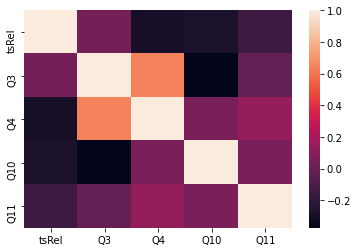

In [16]:
dfTmp = df[['tsRel','Q3', 'Q4', 'Q10', 'Q11']].copy()
corr = dfTmp.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
print(corr['tsRel'])
print(corr)

#### WARNING: Outliers may lead to incorrect conclusions!

          tsRel        Q4
tsRel  1.000000 -0.293579
Q4    -0.293579  1.000000


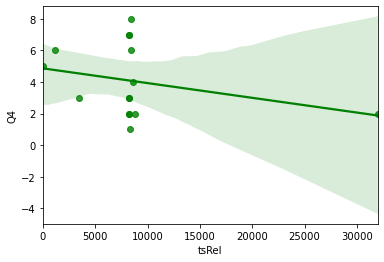

In [17]:
sns.regplot(x='tsRel', y='Q4', data=dfTmp, color="g")
print(df[['tsRel','Q4']].corr())

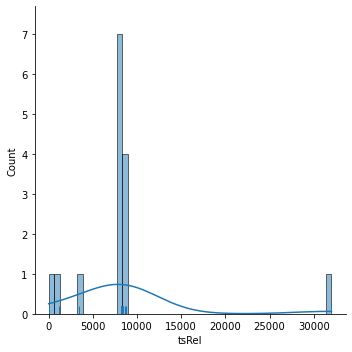

In [18]:
sns.displot(dfTmp.tsRel, kind="hist", rug=True, bins=50, kde=True)
plt.show()

In [19]:
dfTmp.tsRel.median()

8227.0

In [20]:
dfTmp.tsRel - dfTmp.tsRel.median()

0     -8227.0
1     -7057.0
2     -4758.0
3       -34.0
4        -9.0
5        -5.0
6        -1.0
7         0.0
8        30.0
9        47.0
10      171.0
11      183.0
12      421.0
13      556.0
14    23768.0
Name: tsRel, dtype: float64

In [21]:
dfInit.Timestamp

0    2021-01-25 08:17:44
1    2021-01-25 08:37:14
2    2021-01-25 09:15:33
3    2021-01-25 10:34:17
4    2021-01-25 10:34:42
5    2021-01-25 10:34:46
6    2021-01-25 10:34:50
7    2021-01-25 10:34:51
8    2021-01-25 10:35:21
9    2021-01-25 10:35:38
10   2021-01-25 10:37:42
11   2021-01-25 10:37:54
12   2021-01-25 10:41:52
13   2021-01-25 10:44:07
14   2021-01-25 17:10:59
Name: Timestamp, dtype: datetime64[ns]

### Detect outliers

### What about using standard scaling (z-score transformation) + thresholding
#### Typical outlier threshold:  more than +- 2 std. (z<-2 or z>2)

<img src="Images/Standard_deviation_diagram.svg.png">

In [22]:
tsRel_z = (dfTmp.tsRel - dfTmp.tsRel.mean()) / dfTmp.tsRel.std()
tsRel_z

0    -1.208080
1    -1.043072
2    -0.718840
3    -0.052605
4    -0.049079
5    -0.048515
6    -0.047951
7    -0.047810
8    -0.043579
9    -0.041181
10   -0.023693
11   -0.022001
12    0.011565
13    0.030604
14    3.304238
Name: tsRel, dtype: float64

### Outlier detection is a serious task!

#### SciKit methods

<img src="Images/outlierScikit.png">

### Example: a more advanced outlier detection

In [23]:
from sklearn.neighbors import LocalOutlierFactor

# fit the model for outlier detection (default)
X = np.array(dfTmp.tsRel).reshape(dfTmp.shape[0],1)
X.shape
clf = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
clf.fit_predict(X)
dfTmp['outScore'] = clf.negative_outlier_factor_.tolist()
dfTmp

,tsRel,Q3,Q4,Q10,Q11,outScore
0,0.0,7,5,5,10,-106.428199
1,1170.0,6,6,9,6,-99.580677
2,3469.0,3,3,8,7,-86.125590
3,8193.0,3,2,5,8,-0.993845
4,8218.0,7,2,5,8,-0.993845
5,8222.0,5,7,7,9,-1.017140
6,8226.0,7,7,8,10,-1.028787
7,8227.0,5,3,5,6,-1.022963
8,8257.0,5,3,5,9,-0.917871
9,8274.0,4,1,9,9,-1.173222


<AxesSubplot:xlabel='tsRel', ylabel='outScore'>

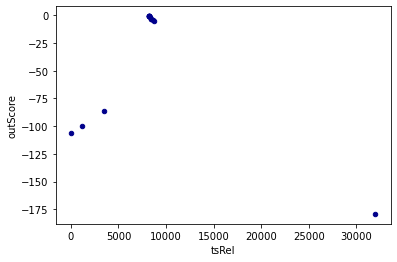

In [24]:
dfTmp.plot.scatter(x='tsRel', y='outScore', c='DarkBlue')

### Correlations for filtered data

In [25]:
dfTmpFil = dfTmp[np.logical_and(dfTmp.outScore>-10, dfTmp.outScore<5)]
dfTmpFil

,tsRel,Q3,Q4,Q10,Q11,outScore
3,8193.0,3,2,5,8,-0.993845
4,8218.0,7,2,5,8,-0.993845
5,8222.0,5,7,7,9,-1.017140
6,8226.0,7,7,8,10,-1.028787
7,8227.0,5,3,5,6,-1.022963
8,8257.0,5,3,5,9,-0.917871
9,8274.0,4,1,9,9,-1.173222
10,8398.0,7,6,4,9,-3.154907
11,8410.0,9,8,6,8,-3.307403
12,8648.0,4,4,8,9,-4.318204


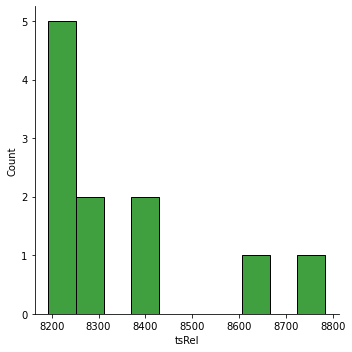

In [26]:
sns.displot(dfTmpFil.tsRel, color="g", bins=10)

tsRel       1.000000
Q3         -0.343333
Q4         -0.054589
Q10         0.381243
Q11         0.413380
outScore   -0.973143
Name: tsRel, dtype: float64


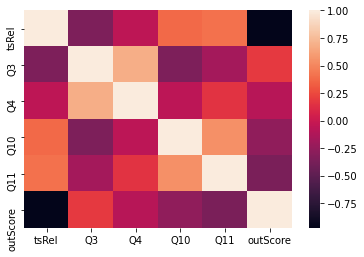

In [27]:
corr = dfTmpFil.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
print(corr['tsRel'])

          tsRel        Q4
tsRel  1.000000 -0.293579
Q4    -0.293579  1.000000


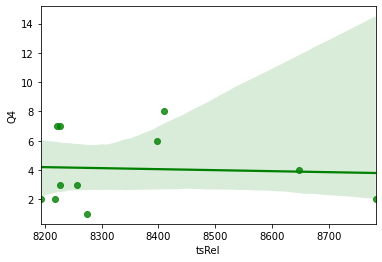

In [28]:
sns.regplot(x='tsRel', y='Q4', data=dfTmpFil, color="g")
print(df[['tsRel','Q4']].corr())

In [29]:
df

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,tsRel,"Q6_Coding for the homework, project or just for fun",Q6_Reading,Q6_Running,Q6_Watching a movie
0,7,5,7,5,5,7,7,7,5,10,0.0,1,0,0,0
1,7,7,6,6,5,7,4,7,9,6,1170.0,1,0,0,0
2,3,4,3,3,2,5,2,6,8,7,3469.0,0,0,0,1
3,5,3,3,2,1,3,5,5,5,8,8193.0,0,0,0,1
4,5,7,7,2,2,8,8,8,5,8,8218.0,0,0,0,1
5,7,7,5,7,7,6,6,10,7,9,8222.0,0,1,0,0
6,7,7,7,7,7,4,9,10,8,10,8226.0,0,0,0,1
7,4,6,5,3,3,5,2,4,5,6,8227.0,0,0,0,1
8,5,5,5,3,3,3,7,7,5,9,8257.0,0,1,0,0
9,3,2,4,1,1,1,2,1,9,9,8274.0,1,0,0,0


### Let's normalize the data

In [30]:
df_norm = (df-df.min())/(df.max()-df.min())

In [31]:
df_norm.head()

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,tsRel,"Q6_Coding for the homework, project or just for fun",Q6_Reading,Q6_Running,Q6_Watching a movie
0,0.666667,0.428571,0.714286,0.571429,0.500,0.857143,0.750,0.666667,0.2,1.00,0.000000,1.0,0.0,0.0,0.0
1,0.666667,0.714286,0.571429,0.714286,0.500,0.857143,0.375,0.666667,1.0,0.00,0.036568,1.0,0.0,0.0,0.0
2,0.000000,0.285714,0.142857,0.285714,0.125,0.571429,0.125,0.555556,0.8,0.25,0.108423,0.0,0.0,0.0,1.0
3,0.333333,0.142857,0.142857,0.142857,0.000,0.285714,0.500,0.444444,0.2,0.50,0.256071,0.0,0.0,0.0,1.0
4,0.333333,0.714286,0.714286,0.142857,0.125,1.000000,0.875,0.777778,0.2,0.50,0.256853,0.0,0.0,0.0,1.0


In [32]:
df_norm.describe()

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,tsRel,"Q6_Coding for the homework, project or just for fun",Q6_Reading,Q6_Running,Q6_Watching a movie
count,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.433333,0.504762,0.476190,0.438095,0.35000,0.457143,0.52500,0.659259,0.493333,0.583333,0.267729,0.266667,0.266667,0.066667,0.400000
std,0.326112,0.279872,0.273551,0.321561,0.31053,0.346578,0.31053,0.298340,0.345309,0.336296,0.221616,0.457738,0.457738,0.258199,0.507093
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.285714,0.285714,0.142857,0.12500,0.142857,0.25000,0.500000,0.200000,0.375000,0.256462,0.000000,0.000000,0.000000,0.000000
50%,0.333333,0.428571,0.428571,0.285714,0.25000,0.571429,0.62500,0.666667,0.400000,0.750000,0.257134,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.714286,0.714286,0.714286,0.50000,0.714286,0.75000,0.944444,0.800000,0.750000,0.262666,0.500000,0.500000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Predictive models

#### Can we predict motivation?
#### Can we predict stress?

In [33]:
df = df.drop(columns=['tsRel'])
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,"Q6_Coding for the homework, project or just for fun",Q6_Reading,Q6_Running,Q6_Watching a movie
0,0.666667,0.428571,0.714286,0.571429,0.500,0.857143,0.750,0.666667,0.2,1.00,1.0,0.0,0.0,0.0
1,0.666667,0.714286,0.571429,0.714286,0.500,0.857143,0.375,0.666667,1.0,0.00,1.0,0.0,0.0,0.0
2,0.000000,0.285714,0.142857,0.285714,0.125,0.571429,0.125,0.555556,0.8,0.25,0.0,0.0,0.0,1.0
3,0.333333,0.142857,0.142857,0.142857,0.000,0.285714,0.500,0.444444,0.2,0.50,0.0,0.0,0.0,1.0
4,0.333333,0.714286,0.714286,0.142857,0.125,1.000000,0.875,0.777778,0.2,0.50,0.0,0.0,0.0,1.0


### Select X and y
<img src="Images/ml_ill2.png" width="400">

In [34]:
colX = df.columns[np.r_[0:8,10:13]]
colX = df.columns[np.r_[0:5]]
colX.tolist()

['Q1', 'Q2', 'Q3', 'Q4', 'Q5']

In [83]:
colY = ['Q10']  # level of stress;
# colY = ['Q11']  # level of motivation;

colY

['Q10']

In [84]:
X = np.array(df[colX])
print(X.shape)
X

(15, 5)


array([[7, 5, 7, 5, 5],
       [7, 7, 6, 6, 5],
       [3, 4, 3, 3, 2],
       [5, 3, 3, 2, 1],
       [5, 7, 7, 2, 2],
       [7, 7, 5, 7, 7],
       [7, 7, 7, 7, 7],
       [4, 6, 5, 3, 3],
       [5, 5, 5, 3, 3],
       [3, 2, 4, 1, 1],
       [9, 8, 7, 6, 5],
       [9, 9, 9, 8, 9],
       [4, 4, 4, 4, 4],
       [4, 4, 2, 2, 2],
       [5, 5, 6, 2, 1]])

In [85]:
y = np.array(df[colY])
print(y.shape)
y

(15, 1)


array([[5],
       [9],
       [8],
       [5],
       [5],
       [7],
       [8],
       [5],
       [5],
       [9],
       [4],
       [6],
       [8],
       [8],
       [5]])

### Normalize data

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
#scaler = MinMaxScaler()

scaler.fit(X)
Xnorm = scaler.transform(X)
Xnorm.max(axis=0)

array([1.79863132, 1.83162188, 1.98206242, 1.80876105, 2.16666667])

In [87]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

#### Cross validation with leave one out

In [88]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
for train_index, test_index in loo.split(Xnorm):
    print('TRAIN: ' + str(train_index) + '  TEST: ' +  str(test_index))


TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]  TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14]  TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14]  TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14]  TEST: [3]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14]  TEST: [4]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14]  TEST: [5]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14]  TEST: [6]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14]  TEST: [7]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14]  TEST: [8]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14]  TEST: [9]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14]  TEST: [10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14]  TEST: [11]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]  TEST: [12]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14]  TEST: [13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]  TEST: [14]


In [89]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import LinearSVR

loo = LeaveOneOut()

predAll = np.zeros([y.shape[0],1])

i=0
for train_index, test_index in loo.split(Xnorm):

    X_train, X_test = Xnorm[train_index], Xnorm[test_index]
    y_train, y_test = y[train_index], y[test_index]

    regr = LinearSVR(random_state=0, tol=1e-5)
    
    regr.fit(X_train, y_train)  #  Train the model

    ypred = regr.predict(X_test)  #  Apply the model
    
    predAll[i] = ypred
    
    print('Y : ' + str(y_test) + ' , pred as: ' + str(ypred))
    i = i + 1 


Y : [[5]] , pred as: [5.49637039]
Y : [[9]] , pred as: [5.6460679]
Y : [[8]] , pred as: [6.61766184]
Y : [[5]] , pred as: [6.047231]
Y : [[5]] , pred as: [3.0178263]
Y : [[7]] , pred as: [5.90665549]
Y : [[8]] , pred as: [6.17522537]
Y : [[5]] , pred as: [6.81497724]
Y : [[5]] , pred as: [5.82713838]
Y : [[9]] , pred as: [5.43843141]
Y : [[4]] , pred as: [4.82455428]
Y : [[6]] , pred as: [4.87604068]
Y : [[8]] , pred as: [6.84140789]
Y : [[8]] , pred as: [6.06047721]
Y : [[5]] , pred as: [3.69118754]


In [90]:
np.corrcoef(y.T, predAll.T)

array([[1.        , 0.42609039],
       [0.42609039, 1.        ]])

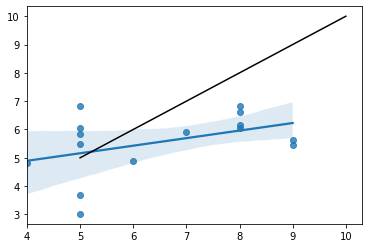

In [91]:
sns.regplot(y.T, predAll.T)
plt.plot([5,10],[5,10],'k')

#### Testing on independent sample

In [92]:
df20Init = pd.read_csv(('./Data/MUSA650-Spring2020-WelcomePoll.csv'))
df20Init.head()

,Timestamp,Q1_General background in data analysis?,Q2_Hands-on experience in data analysis using Python?,Q3_Experience in programming in general?,Q4_General background in machine learning?,Q5_Hands-on experience in running machine learning applications?,Q6_Which one would you prefer on a Sunday afternoon?,Q7_Hands-on experience in image analysis using satellite images?,Q8_Level of interest in mathematics?,Q9_Level of interest in reading?,Q10_Level of stress about this class?,Q11_Your overall motivation about this class?
0,2020/01/14 5:11:10 PM EST,8,5,4,6,7,Running,5,3,5,7,3
1,2020/01/14 5:15:45 PM EST,8,8,5,5,6,Reading,7,7,6,7,8
2,2020/01/14 10:10:14 PM EST,6,6,6,6,5,Watching a movie,7,7,7,7,7
3,2020/01/15 10:02:48 AM EST,5,3,6,4,4,Watching a movie,3,8,8,5,10
4,2020/01/15 10:03:20 AM EST,6,6,5,4,3,Reading,4,5,4,10,8


In [93]:
df20 = df20Init.drop(columns=['Timestamp'])
df20.columns = df20.columns.str.split('_', 1).str[0].tolist()

In [94]:
X20 = np.array(df21[colX])
X20

array([[8, 5, 4, 6, 7],
       [8, 8, 5, 5, 6],
       [6, 6, 6, 6, 5],
       [5, 3, 6, 4, 4],
       [6, 6, 5, 4, 3],
       [8, 7, 8, 3, 3],
       [4, 3, 1, 1, 1],
       [7, 3, 7, 6, 5],
       [5, 5, 5, 4, 4],
       [6, 6, 6, 6, 6],
       [4, 4, 4, 5, 3],
       [7, 7, 7, 2, 2],
       [8, 8, 8, 6, 6],
       [4, 4, 4, 1, 1],
       [8, 7, 7, 7, 7],
       [7, 7, 6, 6, 6],
       [7, 6, 6, 5, 5],
       [6, 6, 6, 5, 5],
       [9, 9, 9, 9, 9]])

In [95]:
y20 = np.array(df20[colY])
y20

array([[ 7],
       [ 7],
       [ 7],
       [ 5],
       [10],
       [ 2],
       [ 8],
       [ 6],
       [ 5],
       [ 5],
       [ 8],
       [ 5],
       [ 6],
       [ 7],
       [ 6],
       [ 5],
       [ 4],
       [ 7],
       [ 4]])

In [96]:
X20norm = scaler.transform(X20)
X20norm.max(axis=0)

array([1.79863132, 1.83162188, 1.98206242, 2.26861556, 2.16666667])

In [97]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import LinearSVR

regr = LinearSVR(random_state=0, tol=1e-5)
    
regr.fit(X, y)  #  Train the model

ypred = regr.predict(X20)  #  Apply the model


In [98]:
np.corrcoef(y20.T, ypred.T)

array([[1.        , 0.01457753],
       [0.01457753, 1.        ]])

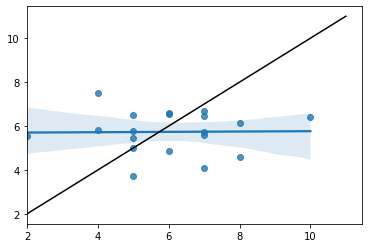

In [99]:
sns.regplot(y20.T, ypred.T)
plt.plot([2,11],[2,11],'k')